
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E03_overfit_regularization.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Overfit and regularization exercises 

---
These are introductory exercises in Machine learning with focus in **overfitting and regularization** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Tips data EDA (*)

In the whole exercise, we will work with the "tips" dataset from seaborn dataset. Start by loading dataset "tips" from the ```load_dataset``` method in seaborn module. The goal will be to use polynomial linear regression to predict tips. 

&nbsp; a) Start by doing some initial EDA such as info(), describe().

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).

&nbsp; c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate. 

&nbsp; d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.

<details>

<summary>Answer</summary>


b)
<img src="../assets/df_describe.png" height="300"/>

c) Here are some example plots

<img src="../assets/tips_EDA.png" height="300"/>

<img src="../assets/tips_smoke_sex.png" width="500"/>

<img src="../assets/tips_bar_sex.png" width="300"/>


d) For example: 
- there are almost double amount of females represented in the dataset
- there are very few tables with 1 person eating, and they usually give very low tip
- female and male tip somewhat similar

</details>

---

In [168]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [170]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [171]:
df.isna()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


In [172]:
df.dropna()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


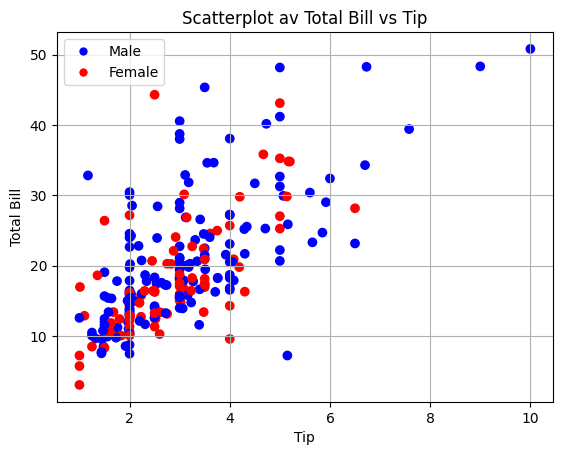

In [173]:
import matplotlib.pyplot as plt

plt.scatter(df['tip'], df['total_bill'], c=df['sex'].map({'Male': 'blue', 'Female': 'red'}))
plt.xlabel('Tip')
plt.ylabel('Total Bill')
plt.title('Scatterplot av Total Bill vs Tip')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Male', markerfacecolor='blue', markersize=7),
                     plt.Line2D([0], [0], marker='o', color='w', label='Female', markerfacecolor='red', markersize=7)],
           loc='upper left')
plt.grid(True)
plt.show()

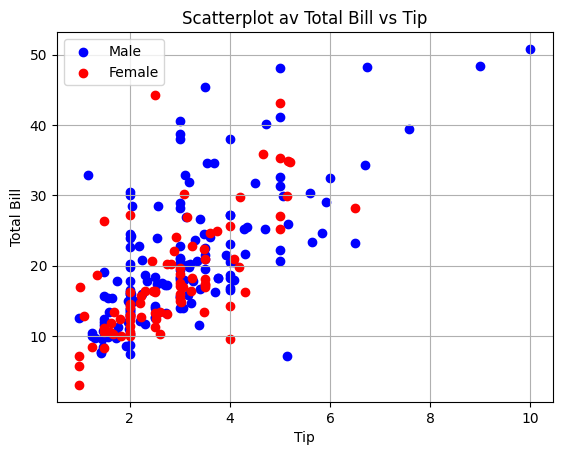

In [174]:
import matplotlib.pyplot as plt

# Skapa scatterplot med etiketter för varje kön
plt.scatter(df[df['sex'] == 'Male']['tip'], df[df['sex'] == 'Male']['total_bill'], c='blue', label='Male')  # Scatter för Male
plt.scatter(df[df['sex'] == 'Female']['tip'], df[df['sex'] == 'Female']['total_bill'], c='red', label='Female')  # Scatter för Female

# Etiketter och titel
plt.xlabel('Tip')
plt.ylabel('Total Bill')
plt.title('Scatterplot av Total Bill vs Tip')

# Automatisk legend baserat på de etiketter vi lade till
plt.legend(loc='upper left')

# Aktivera grid
plt.grid(True)

# Visa grafen
plt.show()


<Axes: xlabel='tip', ylabel='total_bill'>

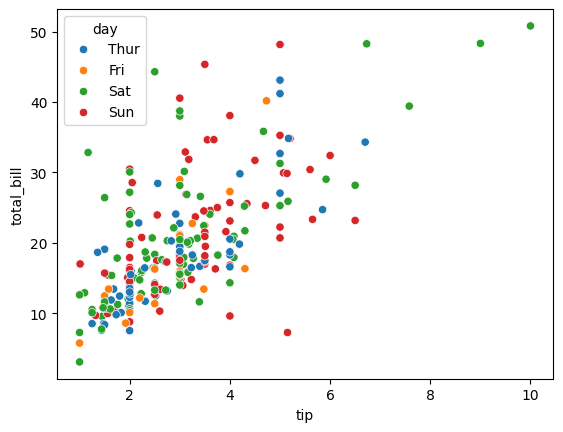

In [175]:
sns.scatterplot(x="tip", y="total_bill", data=df, hue="day")

<Axes: xlabel='tip', ylabel='total_bill'>

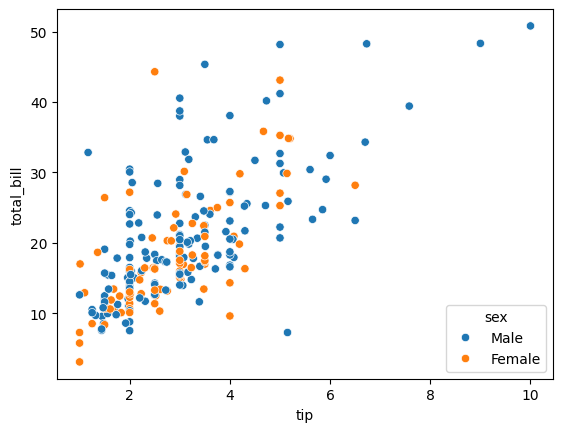

In [176]:
sns.scatterplot(x="tip", y="total_bill", data=df, hue="sex")

<Axes: xlabel='tip', ylabel='Count'>

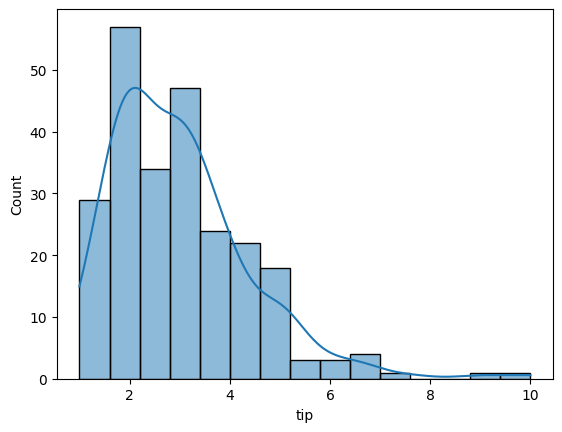

In [177]:
sns.histplot(df["tip"], kde=True, bins=15)

<Axes: xlabel='sex', ylabel='tip'>

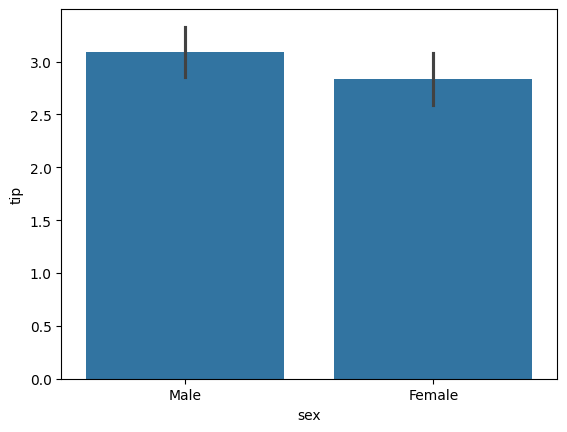

In [178]:
sns.barplot(x="sex",y="tip", data=df, legend=False)

<Axes: xlabel='day', ylabel='tip'>

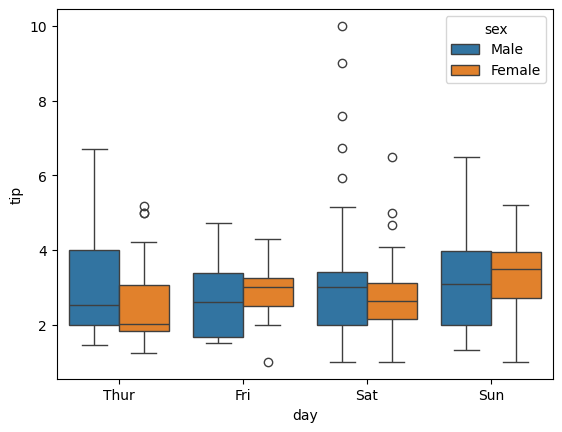

In [179]:
sns.boxplot(x="day", y="tip", data=df, hue="sex")

<Axes: xlabel='day', ylabel='tip'>

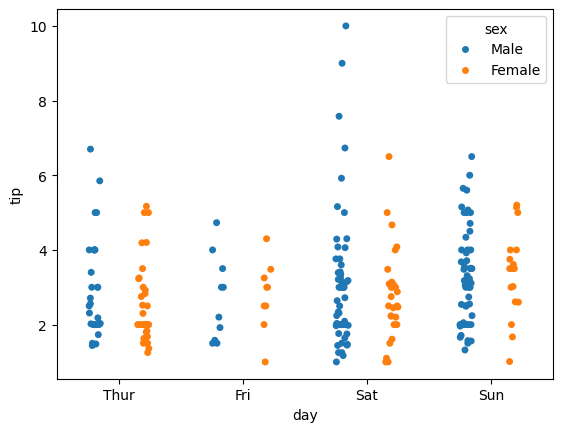

In [180]:
sns.stripplot(x="day", y="tip", data=df, hue="sex", dodge=True)

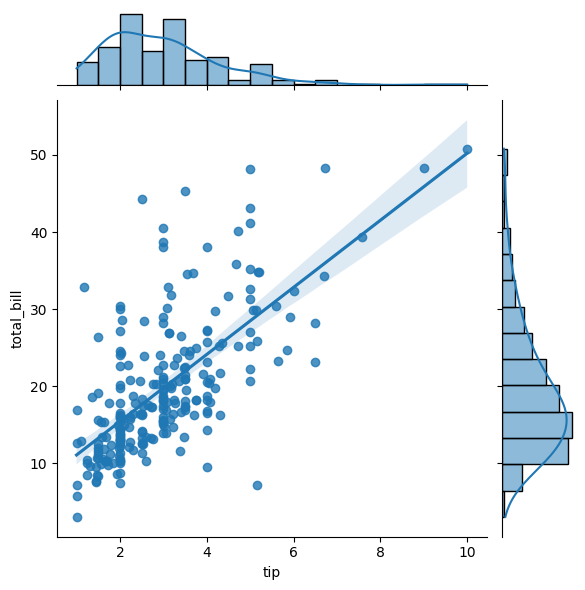

In [181]:
sns.jointplot(x="tip", y="total_bill", data=df, kind="reg")

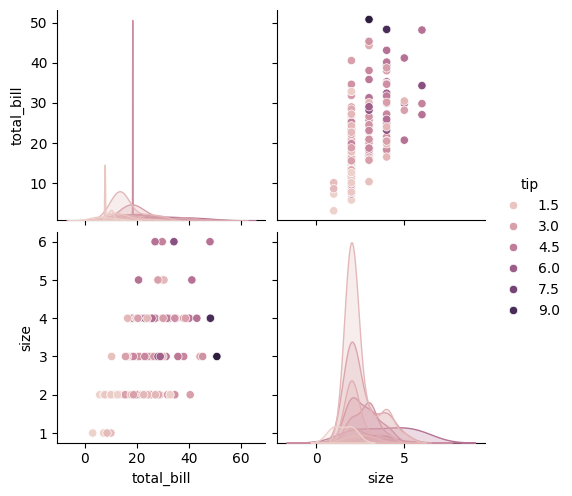

In [182]:
sns.pairplot(df.select_dtypes(["number"]), hue="tip")

<Axes: >

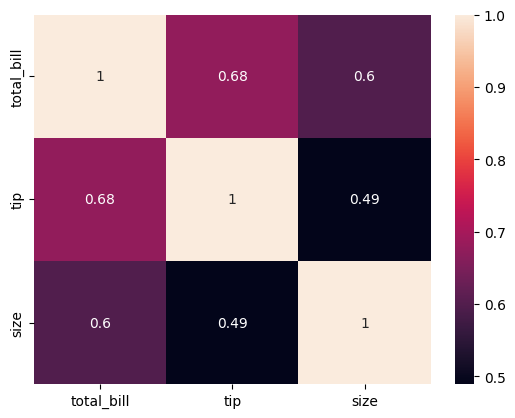

In [183]:
df_drop = df.drop(columns=["sex", "smoker", "day", "time"])
sns.heatmap(df_drop.corr(), annot=True)
# Mindre är bättre

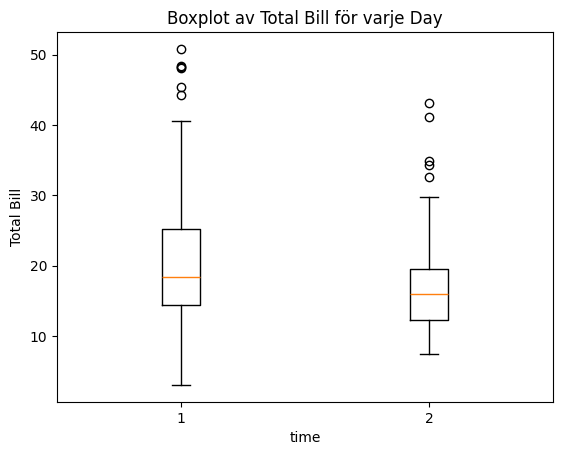

In [184]:
plt.boxplot([df[df["time"] == time]["total_bill"] for time in df["time"].unique()])
plt.xlabel("time")
plt.ylabel("Total Bill")
plt.title("Boxplot av Total Bill för varje Day")
plt.show()

In [185]:
df = df.iloc[:20]
df.style.format(precision=1).background_gradient(cmap="coolwarm")

,total_bill,tip,sex,smoker,day,time,size
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3
2,21.0,3.5,Male,No,Sun,Dinner,3
3,23.7,3.3,Male,No,Sun,Dinner,2
4,24.6,3.6,Female,No,Sun,Dinner,4
5,25.3,4.7,Male,No,Sun,Dinner,4
6,8.8,2.0,Male,No,Sun,Dinner,2
7,26.9,3.1,Male,No,Sun,Dinner,4
8,15.0,2.0,Male,No,Sun,Dinner,2
9,14.8,3.2,Male,No,Sun,Dinner,2


In [186]:
df.style.format(precision=1).bar(subset="total_bill", color="green")

,total_bill,tip,sex,smoker,day,time,size
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3
2,21.0,3.5,Male,No,Sun,Dinner,3
3,23.7,3.3,Male,No,Sun,Dinner,2
4,24.6,3.6,Female,No,Sun,Dinner,4
5,25.3,4.7,Male,No,Sun,Dinner,4
6,8.8,2.0,Male,No,Sun,Dinner,2
7,26.9,3.1,Male,No,Sun,Dinner,4
8,15.0,2.0,Male,No,Sun,Dinner,2
9,14.8,3.2,Male,No,Sun,Dinner,2


In [187]:
df.style.format(precision=1).highlight_between(subset="total_bill", left=5, right=12)

,total_bill,tip,sex,smoker,day,time,size
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3
2,21.0,3.5,Male,No,Sun,Dinner,3
3,23.7,3.3,Male,No,Sun,Dinner,2
4,24.6,3.6,Female,No,Sun,Dinner,4
5,25.3,4.7,Male,No,Sun,Dinner,4
6,8.8,2.0,Male,No,Sun,Dinner,2
7,26.9,3.1,Male,No,Sun,Dinner,4
8,15.0,2.0,Male,No,Sun,Dinner,2
9,14.8,3.2,Male,No,Sun,Dinner,2


In [188]:
def super_style(style):
    style.format(precision=1).bar(vmin=0, color="pink", subset=["tip"])
    style.format(precision=1).background_gradient(subset=["total_bill"])
    style.format(precision=1).highlight_between(left=2, right=3, subset=["size"])
    return style

df.style.pipe(super_style)

,total_bill,tip,sex,smoker,day,time,size
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3
2,21.0,3.5,Male,No,Sun,Dinner,3
3,23.7,3.3,Male,No,Sun,Dinner,2
4,24.6,3.6,Female,No,Sun,Dinner,4
5,25.3,4.7,Male,No,Sun,Dinner,4
6,8.8,2.0,Male,No,Sun,Dinner,2
7,26.9,3.1,Male,No,Sun,Dinner,4
8,15.0,2.0,Male,No,Sun,Dinner,2
9,14.8,3.2,Male,No,Sun,Dinner,2


In [189]:
df = sns.load_dataset("tips")
pd.options.plotting.backend="plotly"
df.groupby("day")["total_bill"].mean().plot(kind="bar")

C:\Users\emil_\AppData\Local\Temp\ipykernel_884\3725635402.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [190]:
pd.options.plotting.backend="plotly"
df.plot.scatter(x="total_bill",y="tip")

## 1. Train|test split (*)

Split the data into training part and testing part, using sklearn's train_test_split with test size of 0.3 and random_state 42.

In [191]:
from sklearn.model_selection import train_test_split

X, y = df.drop(columns=["sex", "smoker", "day", "time", "tip"]), df["tip"]
X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 2), (74, 2), (170,), (74,))

---
## 2. Feature standardization (*)

We need to normalize the data and in this case will be using feature standardization. Implement this yourself following this formula:

$$X_{train}' = \frac{X_{train}-\mu_{train}}{\sigma_{train}}$$

$$X_{test}' = \frac{X_{test}-\mu_{train}}{\sigma_{train}}$$

, where $'$ denotes scaled, $\mu_{train}$ is the mean of the training data, $\sigma_{train}$ is the standard deviation of the training data. Note that it is very important that the mean and standard deviation is computed from the training data and not from testing data to avoid data leakage. Control the standard deviation and mean of $X_{train}'$ and $X_{test}'$. Is the results as you expect, why, why not?

<details>

<summary>Answer</summary>

scaled_X_train (total_bill, size) mean: [ 6.79195262e-17 -1.98534000e-16]

scaled_X_test (total_bill, size) mean: [-0.19137999 -0.04477934]

scaled_X_train (total_bill, size) std: [1. 1.]

scaled_X_test (total_bill, size) std: [0.92495673 1.06638889]

</details>

In [192]:
import numpy as np

mean_X_train = X_train.mean()
std_X_train = X_train.std()
scaled_X_train = (X_train - mean_X_train) / std_X_train # normalisering av X_train

mean_X_test = X_test.mean()
std_X_test = X_test.std()
scaled_X_test = (X_test - mean_X_test) / std_X_test # normalisering av X_test

scaled_X_train["total_bill"].mean(), scaled_X_train["size"].mean()

(6.791952621236252e-17, -1.9853399969767506e-16)

In [193]:
from sklearn.preprocessing import StandardScaler
""" Standardisera train och test med scikit learn """

scaler = StandardScaler()
scale_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.transform(X_test)

print(scale_X_train[:,0].mean(), scale_X_train[:,1].mean())
print(np.mean(scale_X_train[:,0]), np.mean(scale_X_train[:,1])) # med numpy

6.791952621236252e-17 -1.0449157878825003e-16
6.791952621236252e-17 -1.0449157878825003e-16


---
## 3. Polynomial features (*)

We want to investigate ```Polynomialfeatures``` from scikit-klearn in this task. Start by instantiating an object of type ```PolynomialFeatures``` with degree 2. Now do the following: 

- use the method fit on $X_{train}'$
- transform $X_{train}'$
- transform $X_{test}'$

Compare this transformed $X_{test}'$ with $X_{test}''$ where $X_{test}''$ comes from fitting the polynomial features to $X_{test}'$ and transforming $X_{test}'$. You can check directly by using ```==``` and then sum it up. If the value is same as the length, then you know that they are the same, as a boolean True evaluates to 1. 


In [194]:
from sklearn.preprocessing import PolynomialFeatures

poly_feature = PolynomialFeatures(degree= 2)
poly_X_train = poly_feature.fit_transform(scale_X_train)
poly_X_test = poly_feature.transform(scale_X_test)

# print(poly_X_train.shape, poly_X_test.shape)
print(scale_X_train.shape, poly_X_train.shape)

compare = scale_X_train == poly_X_train[:,:2]
print("Matching element", compare.all())

(170, 2) (170, 6)
Matching element False


---
## 4. Polynomial regression  (*)

We will now investigate the training loss and testing loss for different degrees of polynomial. Loop through degrees 1 to 4 (inclusive) and:
- instantiate an object of PolynomialFeatures with that degree
- fit and transform $X_{train}'$ and $X_{test}$ to create polynomial features
- perform linear regression on these polynomial features (polynomial regression)
- predict on both the training and testing data to record RMSE for training and testing for each iteration of the loop

Now plot the results in the same figure. Do you notice anything special? 

<details>

<summary>Answer</summary>

<img src="../assets/E3_overfitting.png" height="300"/>

</details>

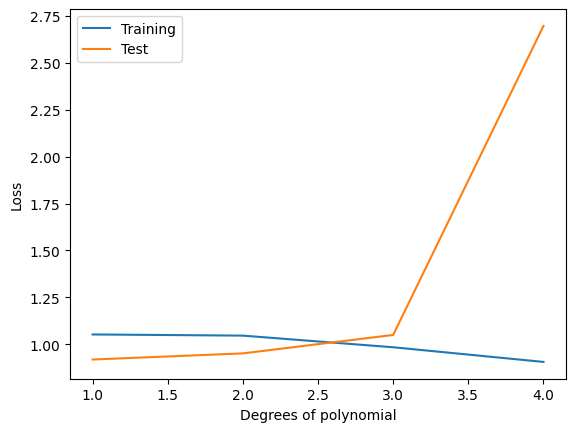

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def poly_regression(scale_X_train, X_test, y_train, y_test):
    train_rmse = []
    test_rmse = []
    deg = (1,2,3,4)

    for i in deg:
        poly_features = PolynomialFeatures(degree=i)


        poly_X_train = poly_features.fit_transform(scale_X_train)
        poly_X_test = poly_features.transform(scale_X_test) # borde det inte vara X_test här?

        model = LinearRegression()
        model.fit(poly_X_train, y_train)

        y_pred_psX_train = model.predict(poly_X_train)
        y_pred = model.predict(poly_X_test)
        
        psX_train_RMSE = np.sqrt(mean_squared_error(y_train, y_pred_psX_train))
        test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

        train_rmse.append(psX_train_RMSE)
        test_rmse.append(test_RMSE)
    
    return train_rmse,test_rmse

train_rmse, test_rmse = poly_regression(scale_X_train, X_test, y_train, y_test)

train_rmse, test_rmse
plt.plot(range(1,5), train_rmse, label="Training")
plt.plot(range(1,5), test_rmse, label="Test")
plt.xlabel("Degrees of polynomial")
plt.ylabel("Loss")
plt.legend()
plt.show()




---
## 5. Regularization methods (*)

Now we will try the regularization methods: ridge regression, lasso regression and elasticnet regression. In the following tasks, use degree = 4. 

&nbsp; a) Use ridge regression with cross-validation and test out different alpha-values. I used $\alpha=[0.01, 0.1, 0.5, 1, 5, 10]$ in the cross-validation. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

&nbsp; b) Use lasso regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

&nbsp; c) Use elasticnet regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. Choose a set of $\ell_1$ ratios for it to try out. I chose $\ell_1 = [.001, .01, .05, .1, .5, .9, .95, 1]$
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

<details>

<summary>Answer</summary>

a) 

Chosen alpha from cross-validation 5.0

Weights: [ 0.          0.91469637  0.23893931 -0.67583593  0.20550801 -0.01369317
 -0.26007685  0.31867863 -0.03429744 -0.12484035  0.16000319 -0.18105113
  0.24878399 -0.12692847  0.05002613]

Mean absolute error: 0.831

Mean squared error: 2.208

Root mean squared error: 1.486

b) 

Chosen alpha from cross-validation 0.208

Weights: [ 0.          0.23469707  0.         -0.         -0.          0.
  0.08814685  0.09735986  0.          0.03219702  0.          0.
  0.         -0.          0.        ]

Mean absolute error: 0.823

Mean squared error: 1.345

Root mean squared error: 1.160

c)

Chosen alpha from cross-validation 0.107

Mean absolute error: 0.761

Root mean squared error: 1.139

L1_ratio: 0.9

Weights: [ 0.          0.23469707  0.         -0.         -0.          0.
  0.08814685  0.09735986  0.          0.03219702  0.          0.
  0.         -0.          0.        ]


</details>

In [196]:
#a)
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

def ridge_regressionCV(scale_X_train, scale_X_test, y_train, y_test):

    poly_feature = PolynomialFeatures(degree= 4) # 4e grads funktioner (inkl interaktionstermerna)
    X_poly_train = poly_feature.fit_transform(scale_X_train) # anpassar och omvandlar scaled träningsdata
    X_poly_test = poly_feature.transform(scale_X_test) # omvandlar testdata till polynomfunktioner

    alphas = [0.01, 0.1, 0.5, 1, 5, 10]

    model_ridge = RidgeCV(alphas=alphas, store_cv_results=True) # Inbyggd krossvalidering och Store som lagrar resultaten och undersöker hur varje alpha presterar.
    model_ridge.fit(X_poly_train, y_train) # Tränar träningsdata

    best_alpha = model_ridge.alpha_ # RidgeCV lagrar bästa alpha värdet när modellen är tränad.

    y_pred = model_ridge.predict(X_poly_test)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)

    ridge_weight = model_ridge.coef_ # coef_ hämtar koefficinterna (vikterna) för varje funktion (både orginala och poly funktioner). Vikterna representerar hur mycket varje funktion bidrar till modellens prediktion.

    print(f"Best alpha choosen by RidgeCV: {best_alpha}")
    print(ridge_weight)
    print(f"Testing MAE: {MAE:.2f}")
    print(f"Testing MSE: {MSE:.2f}")
    print(f"Testing RMSE: {RMSE:.2f}")

ridge_regressionCV(scale_X_train, scale_X_test, y_train, y_test)

Best alpha choosen by RidgeCV: 5.0
[ 0.          0.91433889  0.23803646 -0.67393371  0.20651601 -0.01502712
 -0.25974303  0.31834213 -0.03541485 -0.12391278  0.1589648  -0.18093215
  0.24867839 -0.12671385  0.04977343]
Testing MAE: 0.83
Testing MSE: 2.22
Testing RMSE: 1.49


In [197]:
#b)
from sklearn.linear_model import LassoCV

def lasso_regression(scale_X_train, scale_X_test, y_train, y_test):

    poly_feature = PolynomialFeatures(degree=4)
    X_poly_train = poly_feature.fit_transform(scale_X_train)
    X_poly_test = poly_feature.transform(scale_X_test)

    model_lassoCV = LassoCV(eps=0.001, n_alphas=100, max_iter=10000, cv=5)
    model_lassoCV.fit(X_poly_train, y_train)

    best_alpha = model_lassoCV.alpha_

    y_pred = model_lassoCV.predict(X_poly_test)

    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)

    lasso_weights = model_lassoCV.coef_

    print(f"Best alpha choosen by LassoCV: {best_alpha}")
    print(lasso_weights)
    print(f"Testing MAE: {MAE:.2f}")
    print(f"Testing MSE: {MSE:.2f}")
    print(f"Testing RMSE: {RMSE:.2f}")

lasso_regression(scale_X_train, scale_X_test, y_train, y_test)

Best alpha choosen by LassoCV: 0.2101676095425171
[ 0.          0.2295082   0.         -0.         -0.          0.
  0.08795486  0.09662404  0.          0.03202518  0.          0.
  0.         -0.          0.        ]
Testing MAE: 0.82
Testing MSE: 1.35
Testing RMSE: 1.16


In [201]:
from sklearn.linear_model import ElasticNetCV

# c)

def elasticnet_regression(scale_X_train, scale_X_test, y_train, y_test):

    poly_feature = PolynomialFeatures(degree=4)
    X_poly_train = poly_feature.fit_transform(scale_X_train)
    X_poly_test = poly_feature.transform(scale_X_test)

    model_elasticnetCV = ElasticNetCV(l1_ratio=[0.001, 0.01, 0.05, .1, .5, .9, .95, 1], eps=0.001, n_alphas=100, max_iter=10000)
    model_elasticnetCV.fit(X_poly_train, y_train)

    best_l1 = model_elasticnetCV.l1_ratio_
    best_alpha = model_elasticnetCV.alpha_

    y_pred = model_elasticnetCV.predict(X_poly_test)

    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)

    elasticnet_weights = model_elasticnetCV.coef_

    print(f"Best l1 choosen by ElasticNetCV: {best_l1}")
    print(f"Best alpha choosen by ElasticNetCV: {best_alpha}")

    print(elasticnet_weights)
    print(f"Testing MAE: {MAE:.2f}")
    print(f"Testing MSE: {MSE:.2f}")
    print(f"Testing RMSE: {RMSE:.2f}")

elasticnet_regression(scale_X_train, scale_X_test, y_train, y_test)

Best l1 choosen by ElasticNetCV: 0.9
Best alpha choosen by ElasticNetCV: 0.10839018107107092
[ 0.          0.51628455  0.09794359 -0.2112758   0.          0.
  0.          0.11342458  0.          0.01797787  0.03695473  0.
  0.          0.          0.        ]
Testing MAE: 0.76
Testing MSE: 1.30
Testing RMSE: 1.14


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---